In [45]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [10]:
# 1

round(data[data['slot'] == 'exp']['n_clicks'].sum() / data[data['slot'] == 'control']['n_clicks'].sum() * 100 - 100, 3)

1.614

In [16]:
# 2

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [17]:
exp_median_scores = np.median(get_bootstrap_samples(data[data['slot'] == 'exp']['n_clicks'].values, 1000), axis = 1)
control_median_scores = np.median(get_bootstrap_samples(data[data['slot'] == 'control']['n_clicks'].values, 1000), axis = 1)

In [23]:
stat_intervals(exp_median_scores - control_median_scores, 0.05)

array([1., 1.])

In [18]:
exp_mean_scores = np.mean(get_bootstrap_samples(data[data['slot'] == 'exp']['n_clicks'].values, 1000), axis = 1)
control_mean_scores = np.mean(get_bootstrap_samples(data[data['slot'] == 'control']['n_clicks'].values, 1000), axis = 1)

In [24]:
stat_intervals(exp_mean_scores - control_mean_scores, 0.05)

array([0.19795943, 0.40618774])

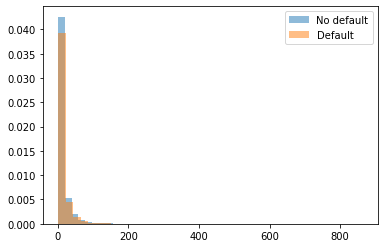

In [27]:
# 3

plt.hist(data[data['slot'] == 'exp']['n_clicks'].values, bins=40, alpha=0.5, label='No default', density=True)
plt.hist(data[data['slot'] == 'control']['n_clicks'].values, bins=40, alpha=0.5, label='Default', density=True)
plt.legend(loc='upper right')
plt.show()

In [30]:
len(data)

566134

In [37]:
# 4

np.random.seed(0)
n_boot_samples = 500

pseudo_samples = get_bootstrap_samples(data[data['slot'] == 'control']['n_clicks'].values, 1000)

means = np.mean(pseudo_samples, axis=1)
squares = np.apply_along_axis(lambda arr: np.sum((np.array(arr) - np.mean(arr))** 2), arr=pseudo_samples, axis=1)


In [35]:
squares

array([150822288, 155230783, 155210874, 155821404, 150123405, 154870986,
       152169440, 155320592, 149368856, 153400075, 154562708, 152394036,
       153126523, 154637630, 152523766, 155441064, 153868881, 151518785,
       150764727, 149438069, 150207653, 155546612, 152848233, 153684711,
       155044718, 150345558, 154569519, 152201172, 154818733, 152007739,
       154443830, 155036728, 154000457, 153474811, 156196014, 152379707,
       153983872, 152616362, 155058530, 155382447, 152102878, 156314992,
       153433624, 151674368, 153002168, 153464556, 154550195, 152187389,
       151782810, 154316549, 149252029, 154735300, 153063405, 150979400,
       154599967, 155884274, 152296592, 153411998, 155237810, 154923960,
       151799605, 155310369, 151770084, 151235349, 152156271, 151949308,
       151350133, 154358019, 152637967, 153844530, 150658437, 154343106,
       151292359, 154017286, 150669323, 157626987, 154803163, 153365260,
       150748781, 155747363, 152883741, 152615563, 

0.9981679505786599

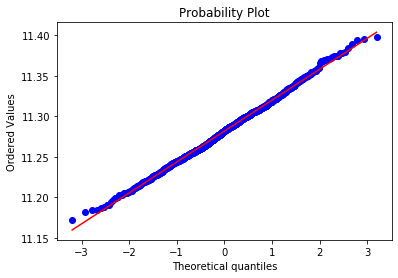

In [64]:
scipy.stats.probplot(means, plot=plt)[1][2] ** 2

0.9967833184064069

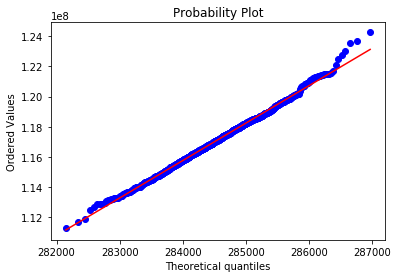

In [63]:
scipy.stats.probplot(squares, dist='chi2', sparams=pseudo_samples.shape[1] - 1, plot=plt)[1][2] ** 2

In [65]:
# 5

scipy.stats.mannwhitneyu(data[data['slot'] == 'exp']['n_clicks'], data[data['slot'] == 'control']['n_clicks'])

MannwhitneyuResult(statistic=38940590204.0, pvalue=3.1236179006848145e-75)

In [78]:
p_values = []
for brwsr in data['browser'].unique():
    p_values.append(scipy.stats.mannwhitneyu(
                data[(data['slot'] == 'exp') & (data['browser'] == brwsr)]['n_clicks'], 
                data[(data['slot'] == 'control') & (data['browser'] == brwsr)]['n_clicks'])[1])

In [80]:
p_values

[0.0272438604197241,
 0.40760617658454984,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032]

In [81]:
import statsmodels.stats.multitest as smm

mod = smm.multipletests(p_values, 
                        alpha = 0.05, 
                        method = 'holm')
mod

(array([False, False,  True, False, False, False]),
 array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
        0.77221655]),
 0.008512444610847103,
 0.008333333333333333)

In [75]:
# 7
for brwsr in data['browser'].unique():
    print(data[(data['slot'] == 'exp') & (data['browser'] == brwsr)]['n_nonclk_queries'].sum() / data['n_queries'].sum() * 100)

4.061686009793957
7.521650522724954
2.037417125303559
1.27880646926401
1.2027509810515395
4.8799580442601425


In [76]:
for brwsr in data['browser'].unique():
    print(data[(data['slot'] == 'control') & (data['browser'] == brwsr)]['n_nonclk_queries'].sum() / data['n_queries'].sum() * 100)

4.28815539572992
8.209478168071096
2.6568673278243633
1.2495277425409683
1.2941955130227722
5.197839009182843
